# Tutorial de imágenes astronómicas: Introducción

Este tutorial tiene como intención familiarizarse con las herramientas de python necesarias para analizar imágenes astronómicas.

## 1) Paquetes necesarios

Los paquetes absolutamente necesarios son casi los mismos que se usan en métodos computacionales 1: numpy, matplotlib, pandas, scipy y sklearn. Las nuevas adiciones serán astropy y photutils. 

Desde un cuaderno de jupyter se puede invocar a la consola usando `!` al inicio de una línea:

In [3]:
!dir

 El volumen de la unidad C es Acer
 El n£mero de serie del volumen es: 58E9-45FA

 Directorio de C:\Users\FELIP\Inroducci¢ a Astropy

25/02/2024  10:19 p. m.    <DIR>          .
25/02/2024  10:14 p. m.    <DIR>          ..
25/02/2024  10:14 p. m.    <DIR>          .ipynb_checkpoints
25/02/2024  10:15 p. m.    <DIR>          data
25/02/2024  10:19 p. m.           970.891 introducci¢n.ipynb
               1 archivos        970.891 bytes
               4 dirs   6.784.598.016 bytes libres


Para instalar paquetes de python se usa `pip`. Dependiendo de su sistema, puede estar bajo el nombre `pip3`. A continuación instalaremos los paquetes mencionados que usaremos a lo largo del curso:

In [10]:
!pip3 install --upgrade numpy scipy matplotlib pandas "astropy[recommended]" photutils scikit-image

Siempre que no haya nada en rojo, quiere decir que los paquetes se instalaron correctamente. 

## 2) Imágenes .fits

### 2.1) Lectura de archivos y directorios en python

En la carpeta `data` hay dos archivos `.fits`. Cuando son pocos archivos, podríamos importar directamente `A.fits` y `B.fits` sin problema; pero más adelante, cuando estemos lidiando con muchas imágenes, conviene tener una manera de que python detecte las imágenes en una carpeta. 

Para esto usaremos el paquete `glob`.

In [1]:
from glob import glob

glob efectivamente sirve como un `ls`, pero dentro de python, y ligeramente más poderoso, porque nos reotrna una lista con los nombres de archivo como strings, que podemos usar en python.

In [2]:
glob("*")

['data', 'introducción.ipynb']

Para escoger los archivos `.fits` que están en la carpeta `data`, usamos:

In [3]:
files = glob("data/*.fits")
files

['data\\A.fits', 'data\\B.fits']

El paquete `astropy` tiene herramientas para leer información de estos archivos `.fits`. Para eso importamos:

In [4]:
from astropy.io import fits

En jupyter podemos obtener información de un objeto preguntando por él. Veamos la descripción del módulo que acabamos de importar:

In [5]:
fits?

Para cada una de nuestras imágenes conviene ver la información general de la imagen, que se obtiene con la función `fits.info`.

In [6]:
for file in files:
    print(fits.info(file))

Filename: data\A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None
Filename: data\B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   
None


Las tres funciones que veremos (info,getheader,getdata) aceptan la ruta del archivo como string:

In [7]:
fits.info("data/A.fits")

Filename: data/A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (318, 509)   float32   


### 2.2) Headers

Las imágenes FITS contienen, además de datos numéricos, un "header" con información adicional que puede ser útil para su uso científico. Podemos ver el header así:

In [8]:
fits.getheader("data/A.fits")

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  318  /                                               
NAXIS2  =                  509  /                                               
OBJECT  = 'M-92 V  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'im010.imh'           /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           1.064900E4  /  DATA MAX                                     
IRAF-MIN=           4.810000E2  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '        

podemos obtener todos los headers de nuestras imágenes:

In [9]:
headers = [fits.getheader(f) for f in files]

Los atributos del header se acceden como si se trataran de diccionarios de python:

In [10]:
headers[0]["OBJECT"]

'M-92 V'

In [11]:
headers[0]["EXPTIME"]

60

In [12]:
headers[0]["DATE-OBS"]

'01/09/87'

### 2.3) datos

Los datos de la imagen se obtienen con `fits.getdata`, y serán guardados en arrays de numpy bidimensionales.

Por esto importamos numpy, antes que nada.

In [13]:
import numpy as np
np.set_printoptions(linewidth=120) # para que se vea

y ahora sí importamos las imágenes como tal:

In [14]:
images = [fits.getdata(f) for f in files]

In [15]:
images[0]

array([[37.184605, 47.360104, 49.133606, ..., 40.524715, 39.21413 , 37.51868 ],
       [41.218204, 47.555954, 48.699158, ..., 43.074856, 54.495537, 50.512478],
       [40.18866 , 42.581043, 53.572693, ..., 44.766705, 37.798122, 59.58666 ],
       ...,
       [47.135468, 40.28973 , 52.449577, ..., 35.836357, 42.49507 , 54.60417 ],
       [44.669   , 39.22278 , 46.34222 , ..., 34.451347, 45.486805, 44.37549 ],
       [38.97707 , 46.36016 , 40.002304, ..., 53.20716 , 54.100876, 58.340065]], dtype=float32)

Con esto podemos hacer operaciones sobre los datos, como se haría con cualquier otro array de numpy.

In [16]:
images[0].max()

10160.793

In [17]:
images[0].min()

-7.8015227

In [18]:
images[0].mean()

46.84091

In [19]:
np.median(images[0])

42.498184

In [20]:
np.std(images[0])

93.601685

### 2.4) Visualización con matplotlib

In [21]:
import matplotlib.pyplot as plt

Usaremos la función imshow:

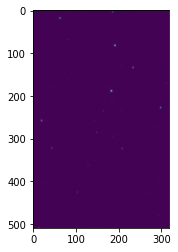

In [22]:
plt.imshow(images[0])

No se ve demasiado, y los colores son artificiales. Podemos cambiar el tamaño de la figura y el mapa de color utilizado para representar los datos.
También recomiendo cambiar el origen de los ejes a "lower".

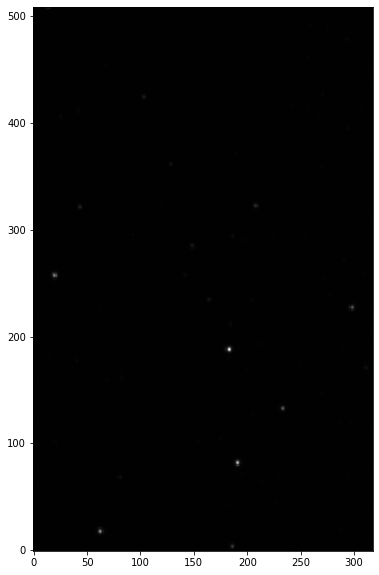

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(images[0],cmap="gray",origin="lower")

Estos cambios se pueden hacer permanentes de esta forma:

In [24]:
#plt.rcParams["figure.figsize"] = (10,10) # no recomendado
plt.rcParams["image.cmap"] = "gray" # pueden ver más colormaps aquí: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

Para visualizar mejor la imagen se limitan los colores con los argumentos `vmin` y `vmax`.

También podemos darnos una idea de qué valores de cuentas estamos viendo con una barra de color.

Juegue con los valores de vmin y vmax hasta poder ver las estrellas del fondo, y quizás un poco del ruido del cielo:

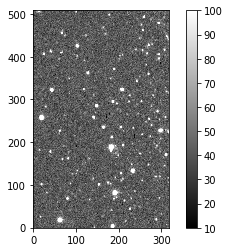

In [25]:
p = plt.imshow(images[0],vmin=10,vmax=100)
plt.colorbar(p)

Uno puede tantearlos imagen a imagen, pero claramente hay maneras más elegantes de hacerlo. 
Podemos definir una función que llame a `plt.imshow`, pero que automáticamente nos ponga el `vmin` y `vmax` a los cuantiles 1% y 99% de los datos de la imagen:

In [26]:
def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

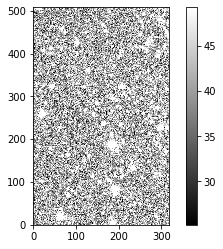

In [27]:
p = quantile_imshow(images[0],upper=0.8)
plt.colorbar(p)

Lo cual nos permite ver mucho más de la imagen que sólo las estrellas brillantes.

Esto ya nos dice algo acerca de las imágenes fotométricas: 
* Usualmente el cielo es muy poco brillante, y esto compone la mayoría de los pixeles de la imagen
* Hay unos pocos puntos ---las estrellas--- muy brillantes.

Esto lo podemos comprobar haciendo un histograma de los valores de los pixeles de la imagen. 
Para esto necesitamos primero aplanar (temporalmente) la imagen de un array 2D:

In [28]:
images[0].shape

(509, 318)

a un array 1D:

In [29]:
flattened = images[0].ravel()
flattened.shape

(161862,)

Ahora podemos hacer el histograma. Modifique el argumento `bins` para que en lugar de que el histograma se vea desde el mínimo a máximo de los datos, use el vmin y el vmax que encontró arriba para la imagen.

Text(0, 0.5, 'Frecuencia')

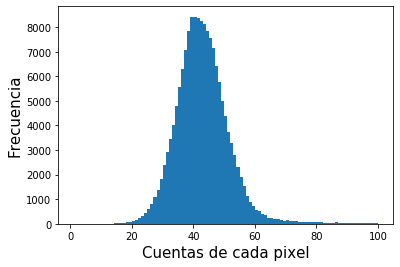

In [30]:
plt.hist(flattened,bins=np.linspace(1,100,100))
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

Podemos usar una escala log-log para poder apreciar todos los datos, sean cielo o estrellas:

Text(0, 0.5, 'Frecuencia')

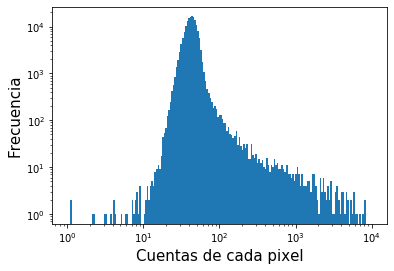

In [31]:
plt.hist(images[0].ravel(),bins=np.logspace(0,4,200),log=True); # qué está haciendo logspace aquí?
plt.xscale("log")
plt.xlabel("Cuentas de cada pixel",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)

### Ejercicio 1

> Defina otra función, llamada `my_imshow`, que ponga automáticamente los `vmin` y `vmax`, pero esta vez a un número dado de desviaciones estándar del promedio de la imagen.
> Es decir, dado $n$,
> $$v_{min}= \mu - n  \sigma$$
> $$v_{max}= \mu + n  \sigma$$
> El `n` por defecto podría ser 5.

Nota: ya que tenemos puntos "atípicos" (las estrellas) la media y la desviación estándar se ven gravemente afectadas, y pueden no ser la mejor idea.
Algunas alternativas son:

* Lo clásico en astronomía: usar "sigma clipping", para lo cual existe el módulo `astropy.stats.sigma_clipping`, y su función `sigma_clipped_stats`.
* La media (`np.median`) como estimador de localización, y la MAD como estimador de escala (`scipy.stats.median_abs_deviation`).
* Estimadores robustos un poco más elegantes, disponibles en `astropy.stats.biweight.biweight_location` y `astropy.stats.biweight.biweight_scale`.

Yo la verdad me quedo con mis cuantiles la mayoría de las veces.

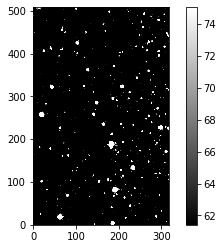

In [41]:
from astropy.stats import biweight_location, biweight_scale
from astropy.stats import sigma_clipped_stats
from scipy.stats import median_abs_deviation

img= images[0]
a=0
b=0

def my_imshow(img,n,lower=a,upper=b, **kwargs):
    n=5
    a = np.median(img) + n*median_abs_deviation(img.ravel())
    b = np.median(img) + n*median_abs_deviation(img.ravel())
    
    img_vmin = a
    img_vmax = b
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax, **kwargs)

p = my_imshow(images[0],5,upper=0.8)

plt.colorbar(p)

### 2.5) subplots y zoom

Podemos ver las imágenes al tiempo usando subplots:

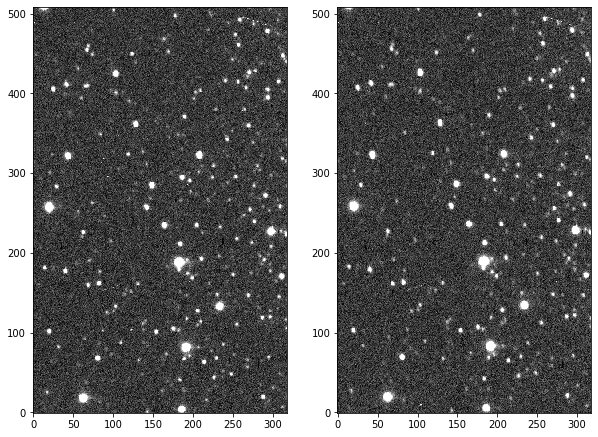

In [38]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))

plt.sca(ax[0]) # sca: Set Current Axis
quantile_imshow(images[0])

plt.sca(ax[1]) # sca: Set Current Axis
quantile_imshow(images[1])

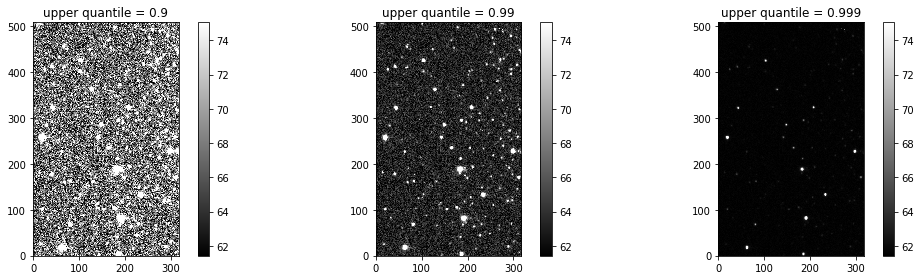

In [43]:
fig,ax = plt.subplots(ncols=3, figsize=(15,4))

for i in range(3):
    plt.sca(ax[i])
    quantile_imshow(images[0],lower=0.1,upper=1-0.1**(i+1))
    #p = my_imshow(images[0], lower=0.1, upper=1-0.1**(i+1))
    plt.title('upper quantile = '+str(1-0.1**(i+1)))
    plt.colorbar(p)
plt.tight_layout()


A primera vista son completamente iguales. Podemos ver un poco más de cerca usando slicing. 

Seleccionemos esa primera estrella brillante en la esquina inferior. Como primer paso, seleccionemos los pixeles de 0 a 100 en x y en y:

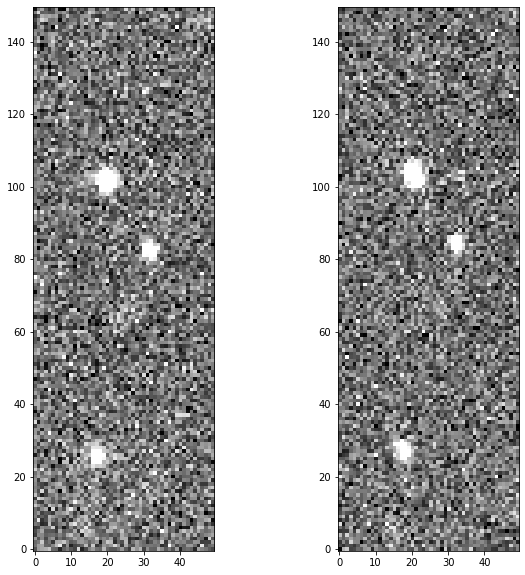

In [45]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    quantile_imshow(image[:150,:50])

La estrella parece estar en el pixel 60,20, más o menos. Pero algo para tener en cuenta es que en numpy el orden de los ejes es `[y,x]`.
Entonces, si queremos ver a detalle esa estrella, queremos el slice `[y=10:30, x=50:70]`

# A partir de acá se trabajará con la estrella que el profesor me asignó en clase, y todas las calibraciones se harán basadas en ella

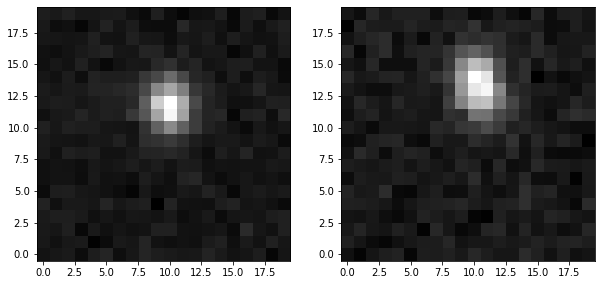

In [47]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(image[90:110,10:30])

Podemos observar que la estrella está ligeramente corrida. Dado que las imágenes fueron tomadas a tres minutos la una de la otra:

In [67]:
""""fig,ax = plt.subplots(ncols=3, figsize=(15,4))

for i in range(3):
    plt.sca(ax[i])
    p= my_imshow(images[0],lower=0.1, upper=1-0.1**(i+1))
    plt.title('upper quantile = '+str(1-0.1**(i+1)))
    plt.colorbar(p)
plt.tight_layout()
""""

SyntaxError: EOL while scanning string literal (<ipython-input-67-b7b56fea3a73>, line 9)

In [48]:
for h in headers:
    print(h["DATE-OBS"]+h["UT"])

01/09/87 3:30:24.00
01/09/87 3:33:18.00


Es razonable pensar que es un efecto del telescopio, no de la estrella. Esto también se puede comprobar porque todas las estrellas estarían corridas de la misma forma.

Podemos ayudarnos poniendo un "crosshair" en la imagen, con las siguientes dos funciones de matplotlib:

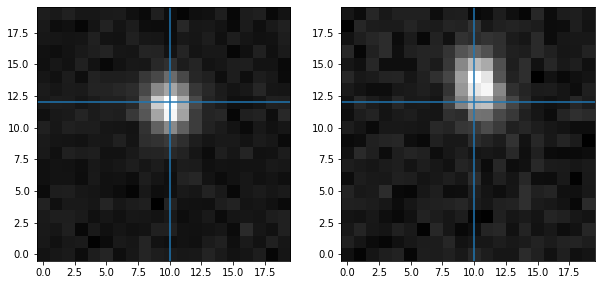

In [50]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image in enumerate(images):
    plt.sca(ax[i])
    plt.imshow(image[90:110,10:30])
    plt.axvline(10.0) # axis vertical line
    plt.axhline(12.0) # axis horizontal line

O también sumando la imagen en x y en y, y comparando los picos que representa la estrella:

In [54]:
sum_y = [image[90:110,10:30].sum(axis=0) for image in images]
sum_x = [image[90:110,10:30].sum(axis=1) for image in images]

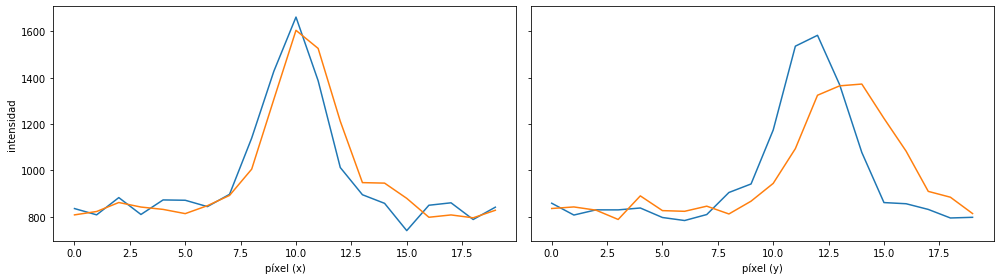

In [55]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4),sharey=True)

plt.sca(ax[0])
plt.plot(sum_y[0])
plt.plot(sum_y[1])
plt.xlabel("píxel (x)")
plt.ylabel("intensidad")

plt.sca(ax[1])
plt.plot(sum_x[0])
plt.plot(sum_x[1])
plt.xlabel("píxel (y)")

plt.tight_layout()

### 2.6) Operaciones entre imágenes 

Más adelante se verán maneras más avanzadas de detectar movimiento, rotación, cambios de zoom y hasta perspectiva entre imágenes. Por ahora quisiéramos simplemente aproximar este movimiento como un vector de desplazamiento en pixeles.

Para eso restaremos ambas imágenes. Si las imágenes estuvieran bien alineadas, esta resta debería ser ruido.

Si no lo están, como en este caso, se ve algo como esto:

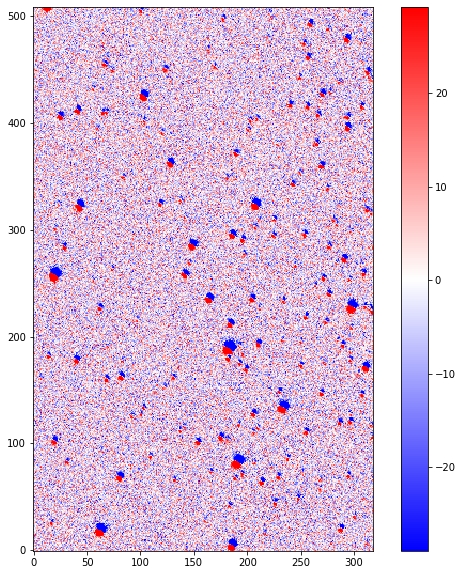

In [58]:
plt.figure(figsize=(10,10))
p = quantile_imshow(images[0] - images[1],cmap="bwr")
plt.colorbar(p)

Así podemos darnos cuenta que todas las estrellas están movidas un poco en x y un poco en y.

### Ejercicio 2 (o tarea, depende de cómo estemos)

> Encuentre el desplazamiento en píxeles en x y y en y entre las dos imágenes.

Esto se puede hacer de muchas maneras. 

* Puede elegir varias estrellas brillantes, hacer mucho zoom, y tratar de sacar el punto máximo a ojo, y promediar sus resultados.

* Puede sumar en x y en y, como vimos antes (con varias estrellas o con toda la imagen) e intentar optimizar el corrimiento en cada eje por separado; es decir, correr una de las curvas en el eje x hasta que los picos se superpongan.

* Si va a transformar la imagen entera, puede usar `scipy.ndimage.shift`, que recibe una imagen y un vector de corrimiento. Podría entonces restar ambas imágenes, sumar los cuadrados, y minimizar con `scipy.optimize.minimize`.

Lo más adecuado en astronomía sería usar las coordenadas (o centroides) de las estrellas, pero eso es algo que aprenderemos más adelante.

In [148]:
pip install photutils

Note: you may need to restart the kernel to use updated packages.


In [61]:
from skimage.feature import peak_local_max
from photutils.centroids import centroid_quadratic

Ahora lo que se va a hacer es una suma para todos los valores de los pixeles de la imagen respecto al eje X y Y, para luego hallar la media de estas, realizar la resta y así alinear las imágenes.

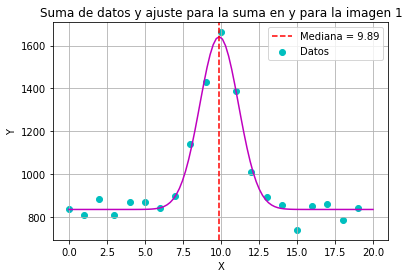

In [210]:
#Suma sobre Y para la imagen 1
def exponential_func(X, A, B, C, S):
    return A * np.exp(-((X - C) / S) ** 2) + B

x_data = np.arange(0, 20)
y_data = sum_y[0]

initial_guess = [1, 1, 10, 1]

params, covariance = curve_fit(exponential_func, x_data, y_data, p0=initial_guess)

x_new = np.linspace(0,20,100)
y_fit = exponential_func(x_new, *params)

plt.scatter(x_data, y_data, color='c', label='Datos')
plt.plot(x_new, y_fit, color='m')
plt.title('Suma de datos y ajuste para la suma en y para la imagen 1')
plt.xlabel('X')
plt.ylabel('Y')


mu = params[2]
mediana1 = mu
plt.axvline(mediana1, color='r', linestyle='--', label=f'Mediana = {mediana1:.2f}')
plt.legend()
plt.grid(True)
plt.show()

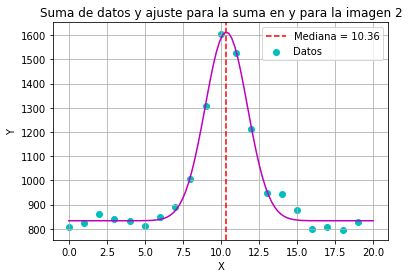

In [211]:
#Suma sobre Y para la imagen 2
def exponential_func(X, A, B, C, S):
    return A * np.exp(-((X - C) / S) ** 2) + B

x_data = np.arange(0, 20)
y_data = sum_y[1]

initial_guess = [1, 1, 10, 1]

params, covariance = curve_fit(exponential_func, x_data, y_data, p0=initial_guess)

x_new = np.linspace(0,20,100)
y_fit = exponential_func(x_new, *params)

plt.scatter(x_data, y_data, color='c', label='Datos')
plt.plot(x_new, y_fit, color='m')
plt.title('Suma de datos y ajuste para la suma en y para la imagen 2')
plt.xlabel('X')
plt.ylabel('Y')
mu = params[2]
mediana2 = mu
plt.axvline(mediana2, color='r', linestyle='--', label=f'Mediana = {mediana2:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [212]:
deltay=(mediana1-mediana2) #corrimiento en y de la imagen 1 respecto a la imagen 2
print(deltay)

-0.47213042103434866


Ahora se repite el mismo proceso pero sobre los pixeles de X para determinar el corrimiento en este caso

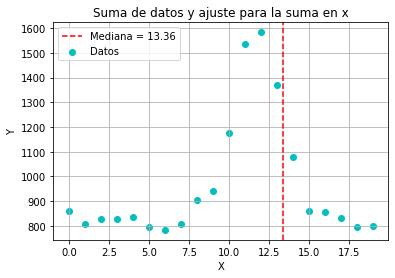

In [225]:
#Suma sobre X para la imagen 1
def exponential_func(X, A, B, C, S):
    return A * np.exp(-((X - C) / S) ** 2) + B

x_data = sum_x[0]
y_data = np.arange(0, 20)

initial_guess = [1, 1, 10, 1]

#params, covariance = curve_fit(exponential_func, y_data, x_data, p0=initial_guess)

y_new = np.linspace(0,20,100)
x_fit = exponential_func(y_new, *params)

plt.scatter(y_data, x_data, color='c', label='Datos')
#plt.plot(x_fit,y_new, color='m')
plt.title('Suma de datos y ajuste para la suma en x para la imagen 1')
plt.xlabel('X')
plt.ylabel('Y')


mu = params[2]
mediana_ = mu
plt.axvline(mediana_, color='r', linestyle='--', label=f'Mediana = {mediana_:.2f}')
plt.legend()
plt.grid(True)
plt.show()

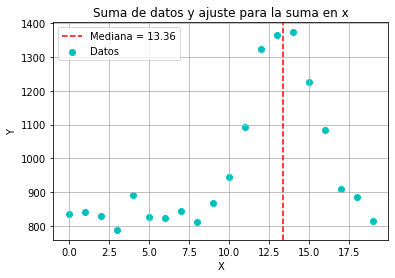

In [218]:
#Suma sobre X para la imagen 2
def exponential_func(X, A, B, C, S):
    return A * np.exp(-((X - C) / S) ** 2) + B

x_data = sum_x[1]
y_data = np.arange(0, 20)

initial_guess = [1, 1, 10, 1]

params, covariance = curve_fit(exponential_func, y_data, x_data, p0=initial_guess)

y_new = np.linspace(0,20,100)
x_fit = exponential_func(y_new, *params)

plt.scatter(y_data, x_data, color='c', label='Datos')
#plt.plot(x_fit,y_new, color='m')
plt.title('Suma de datos y ajuste para la suma en y para la imagen 1')
plt.xlabel('X')
plt.ylabel('Y')


mu = params[2]
mediana1 = mu
plt.axvline(mediana1, color='r', linestyle='--', label=f'Mediana = {mediana1:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [228]:
deltax=(mediana_-mediana2) #corrimiento en y de la imagen 1 respecto a la imagen 2
print(deltax)

3.002863841857879


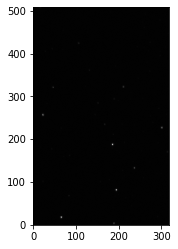

In [235]:
# Resta de imagenes
shifted_image = scipy.ndimage.shift(images[0], (deltay, deltax))

plt.imshow(shifted_image, cmap='gray')
plt.show()
# sale una imagen vacía, como se esperaba

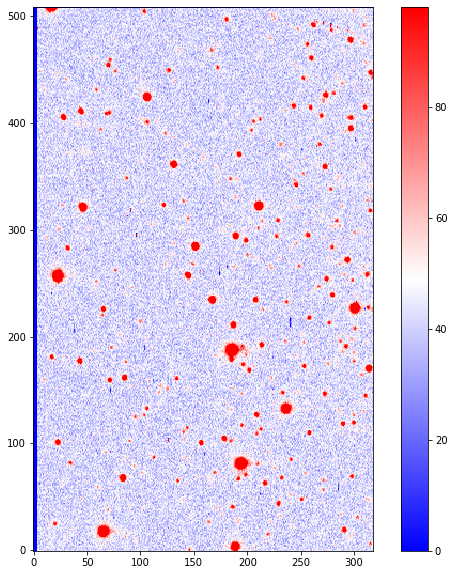

In [236]:
plt.figure(figsize=(10,10))
p = quantile_imshow(shifted_image,cmap="bwr")
plt.colorbar(p)

In [237]:
# fin ;)